**We are analyzing the dataset to answer:**

1) Which apps/categories have the most installs (popularity).

2) Which apps have the highest ratings (quality).

3) Which apps make more money (paid apps revenue).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("/content/googleplaystore.csv")

In [5]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [7]:
df[df['Rating'].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [8]:
#Drop Null values

df=df.dropna(subset=['Rating'])

In [9]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,1
Genres,0


In [10]:
#Fill Null Values

df.loc[:, "Current Ver"].fillna("Not Available", inplace=True)
df.loc[:, "Android Ver"].fillna("Not Available", inplace=True)
df.loc[:, "Content Rating"].fillna("Not Available", inplace=True)

/tmp/ipython-input-3608687132.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:, "Current Ver"].fillna("Not Available", inplace=True)
/tmp/ipython-input-3608687132.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [11]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [12]:
#Check Duplicate Values

df.duplicated().sum()

np.int64(474)

In [13]:
#Drop duplicate values

df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
#Check Ratings

df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Not Available,"February 11, 2018",1.0.19,4.0 and up,Not Available


In [16]:
#Set rating is 1 to 5

df=df[df['Rating']<=5]

In [17]:
df["Installs"].head()

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"


In [18]:
#Convert string into int

df.loc[:, "Installs"] = df["Installs"].str.replace(",", "").str.replace("+", "")
df.loc[:, "Installs"] = df["Installs"].astype(int)

In [19]:
df["Installs"].head()

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000


In [20]:
#Clean the price columns

df.loc[:, "Price"] = df["Price"].str.replace("$", "")
df.loc[:, "Price"] = df["Price"].astype(float)

In [21]:
df["Price"].unique()[:10]


array([0.0, 4.99, 3.99, 6.99, 7.99, 5.99, 2.99, 3.49, 1.99, 9.99],
      dtype=object)

In [22]:
# Replace "Varies with device" with NaN
df.loc[:, "Size"].replace("Varies with device", np.nan, inplace=True)

# Handle sizes in MB
df.loc[:, "Size"] = df["Size"].astype(str).str.replace("M", "")

# Handle sizes in KB (convert KB → MB)
df.loc[:, "Size"] = df["Size"].astype(str).str.replace("k", "")
df.loc[:, "Size"] = df["Size"].apply(lambda x: str(float(x)/1024) if str(x).isdigit() else x)

# Convert to numeric
df.loc[:, "Size"] = pd.to_numeric(df["Size"], errors="coerce")

/tmp/ipython-input-1349232076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:, "Size"].replace("Varies with device", np.nan, inplace=True)


In [23]:
df["Size"].head()

,Size
0,0.018555
1,0.013672
2,8.7
3,0.024414
4,2.8


In [24]:
df["Category"].unique()
df["Type"].unique()
df["Content Rating"].unique()
df["Genres"].unique()[:20]


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video'], dtype=object)

In [25]:
#clean Category and keep only the main

df["Category"] = df["Category"].apply(lambda x: x.split(";")[0])


In [26]:
df["Category"].unique()



array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [27]:
df["Type"].unique()



array(['Free', 'Paid'], dtype=object)

In [28]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [29]:
df["Content Rating"]= df["Content Rating"].replace("Unrated", "Everyone")

In [30]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

In [31]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

**Which categories have the most apps?**

In [53]:
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
category_installs.to_csv('category_installs.csv', index=False)


In [34]:
df["Category"].value_counts()

,count
Category,
FAMILY,1718
GAME,1074
TOOLS,734
PRODUCTIVITY,334
FINANCE,317
PERSONALIZATION,310
COMMUNICATION,307
LIFESTYLE,305
PHOTOGRAPHY,304


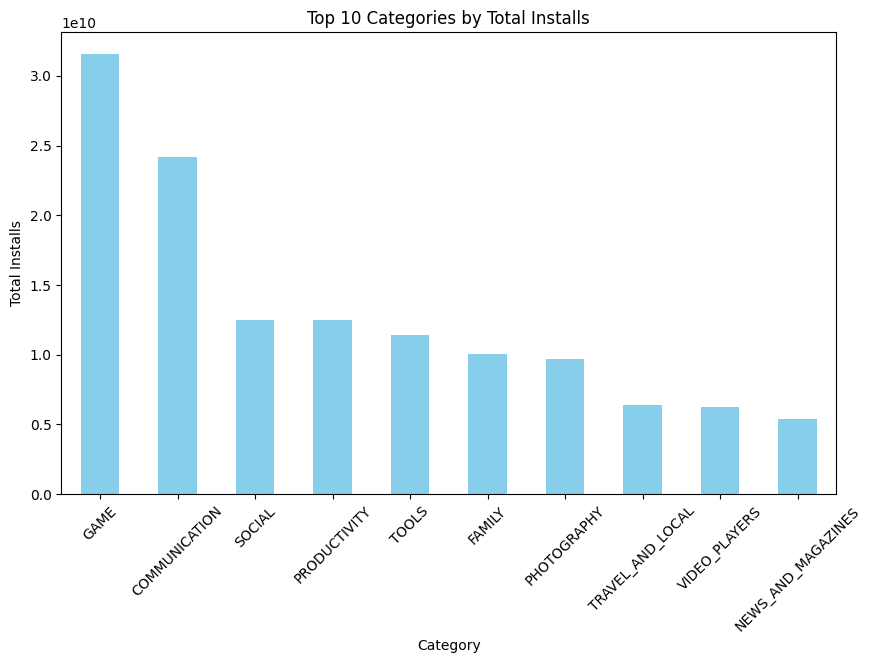

In [51]:
top_category= category_installs.head(10)

plt.figure(figsize=(10,6))
top_category.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.show()

**Which apps have the highest ratings (quality).**

In [54]:
high_rating = df[['App', 'Rating']].sort_values(by='Rating', ascending=False)
print(high_rating.head(10))
high_rating.to_csv('high_rating.csv', index=False)


                                                     App  Rating
10837                   Fr. Mike Schmitz Audio Teachings     5.0
4477                           Android P Style Icon Pack     5.0
4452                                     P-Home for KLWP     5.0
10820                                    Fr. Daoud Lamei     5.0
9496                                          Master E.K     5.0
9455                                        EJ messenger     5.0
9444   Kolkata News:Anandbazar Patrika,ei samay&AllRa...     5.0
9427                                             ei Calc     5.0
9411                                             NEMA ei     5.0
9365                                Eh Bee Wallpapers HD     5.0


In [42]:
# Filter apps with more than 100,000 reviews
popular_high_rating = df[df['Reviews'].astype(int) > 100000]

# Sort by Rating
popular_high_rating = popular_high_rating[['App', 'Rating', 'Reviews']].sort_values(by='Rating', ascending=False)

print(popular_high_rating.head(10))


                                                    App  Rating  Reviews
9625                                         JW Library     4.9   922752
79                              Tickets + PDA 2018 Exam     4.9   197136
1260                  Six Pack in 30 Days - Abs Workout     4.9   272337
2344                                     Period Tracker     4.9   100082
712      Learn Japanese, Korean, Chinese Offline & Free     4.9   133136
4854                  Six Pack in 30 Days - Abs Workout     4.9   272172
9816  File Manager by Xiaomi: release file storage s...     4.8   337532
151          Free Books - Spirit Fanfiction and Stories     4.8   116507
70    Fines of the State Traffic Safety Inspectorate...     4.8   116986
9853                       Amino: Communities and Chats     4.8  1264084


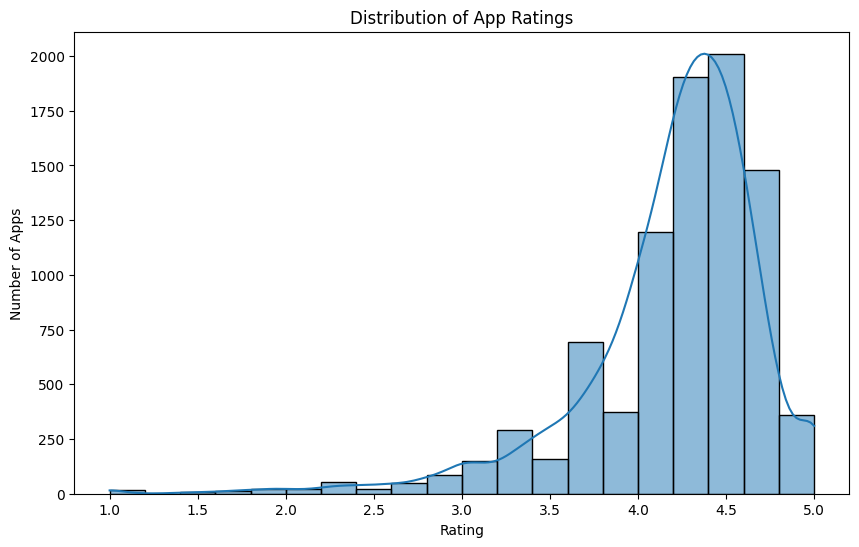

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

**Which apps make more money (paid apps revenue).**

In [56]:
# Filter for paid apps
paid_apps = df[df['Type'] == 'Paid'].copy()

# Calculate revenue (assuming revenue is Price * Installs)
paid_apps.loc[:, 'Revenue'] = paid_apps['Price'] * paid_apps['Installs']

# Sort by revenue and display the top 10
top_revenue_apps = paid_apps[['App', 'Category', 'Price', 'Installs', 'Revenue']].sort_values(by='Revenue', ascending=False)
print(top_revenue_apps.head(10))
top_revenue_apps.to_csv('top_revenue.csv', index=False)

                                App     Category   Price  Installs     Revenue
4347                      Minecraft       FAMILY    6.99  10000000  69900000.0
2241                      Minecraft       FAMILY    6.99  10000000  69900000.0
5351                      I am rich    LIFESTYLE  399.99    100000  39999000.0
5356              I Am Rich Premium      FINANCE  399.99     50000  19999500.0
4034                  Hitman Sniper         GAME    0.99  10000000   9900000.0
7417  Grand Theft Auto: San Andreas         GAME    6.99   1000000   6990000.0
2883            Facetune - For Free  PHOTOGRAPHY    5.99   1000000   5990000.0
5578        Sleep as Android Unlock    LIFESTYLE    5.99   1000000   5990000.0
8804            DraStic DS Emulator         GAME    4.99   1000000   4990000.0
4367       I'm Rich - Trump Edition    LIFESTYLE   400.0     10000   4000000.0


/tmp/ipython-input-2380097702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='App', y='Revenue', data=top_revenue_apps.head(10), palette='viridis')


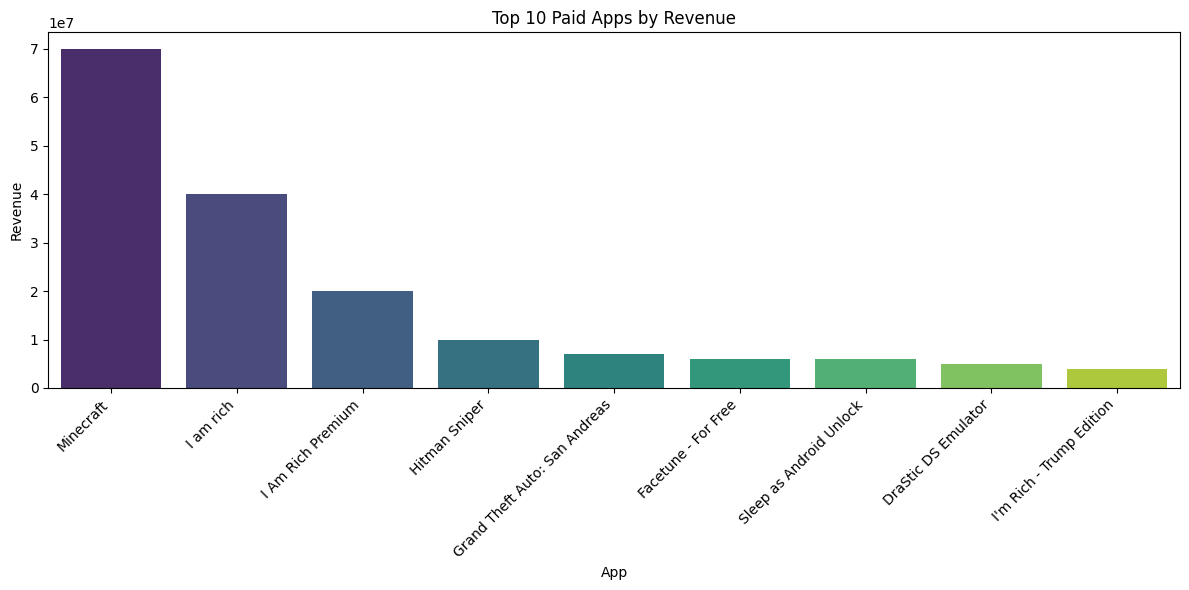

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='App', y='Revenue', data=top_revenue_apps.head(10), palette='viridis')
plt.title('Top 10 Paid Apps by Revenue')
plt.xlabel('App')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()